In [57]:
%matplotlib notebook

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("../")
import tensorflow_riemopt as riemopt

In [58]:
def plot_halfsphere(ax, color="blue"):
    phi = np.linspace(0, np.pi, 20)
    psi = np.linspace(0, 2 * np.pi, 20)
    s_x = np.outer(np.sin(phi), np.sin(psi))
    s_y = np.outer(np.sin(phi), np.cos(psi))
    s_z = np.outer(np.abs(np.cos(phi)), np.ones_like(psi))
    return ax.plot_wireframe(s_x, s_y, s_z, color=color, alpha=0.3)

def plot_vector(ax, x, u, color="darkorange"):
    return ax.quiver(*x, *u, length=0.6, normalize=True, color=color)

def plot_hyperplane(ax, p, u, v, color="limegreen"):
    xx = np.linspace(-0.05, 1., 10)
    yy = np.linspace(-1., 0.1, 10)
    x, y = np.meshgrid(xx, yy)
    n = np.cross(u, v)
    z = (- n[0] * x - n[1] * y + p.dot(n)) / n[2]
    return ax.plot_wireframe(x, y, z, color=color, alpha=0.4)

In [114]:
S = riemopt.manifolds.Sphere()

x = S.projx(tf.constant([0.1, -0.1, 0.1]))
u = S.proju(x, tf.constant([1., 1., 1.]))
v = S.proju(x, tf.constant([-0.7, -1.4, 1.4]))
y = S.exp(x, v)
u_ = S.transp(x, y, u)
v_ = S.transp(x, y, v)

x = x.numpy()
u = u.numpy()
v = v.numpy()
y = y.numpy()
u_ = u_.numpy()
v_ = v_.numpy()

<IPython.core.display.Javascript object>


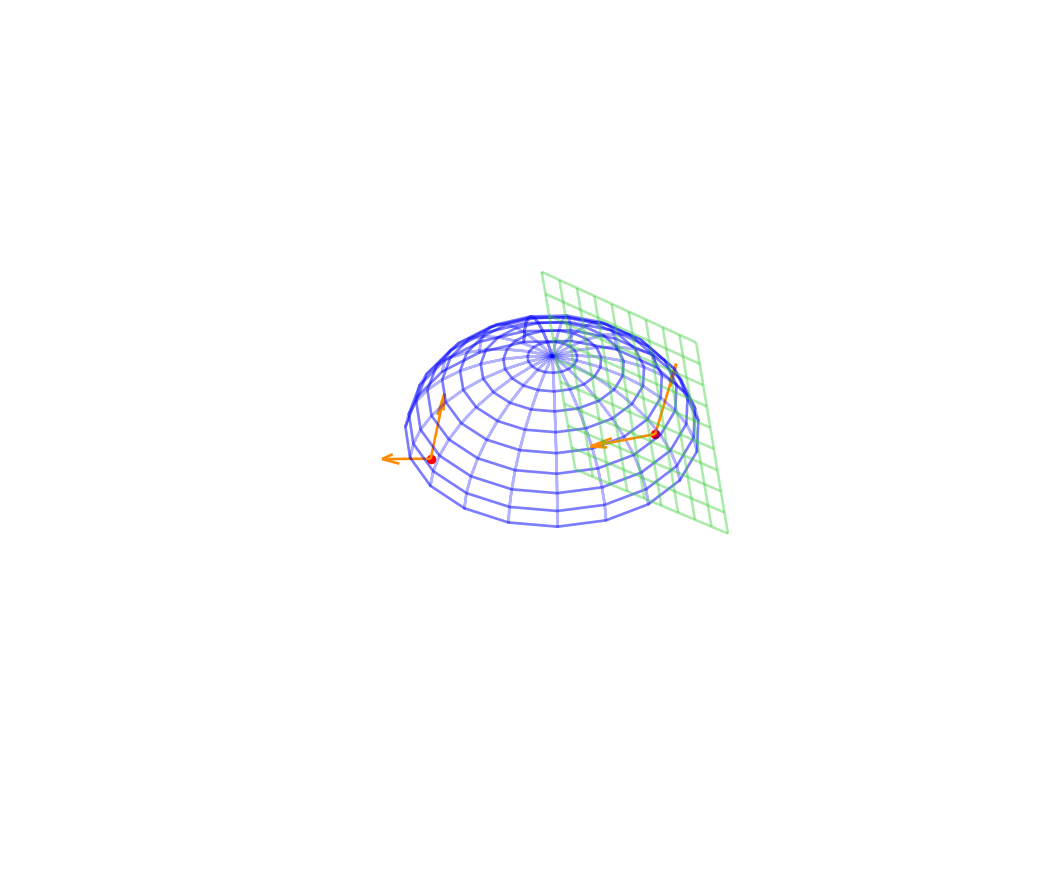

In [115]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.axis("off")
ax.set_zlim3d(-1.5, 1.5) 
ax.set_ylim3d(-1.5, 1.5) 
ax.set_xlim3d(-1.5, 1.5) 

plot_halfsphere(ax)
plot_hyperplane(ax, x, u, v)
ax.scatter(*x, color="red")
plot_vector(ax, x, u)
plot_vector(ax, x, v)
ax.scatter(*y, color="red")
plot_vector(ax, y, u_)
plot_vector(ax, y, v_)

plt.show()